# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2021-s109a/blob/master/lectures/crest.png?raw=true"> CS-S109A Introduction to Data Science 

## Lecture 4: Multiple Linear Regression

**Harvard University**<br>
**Summer 2021**<br>
**Instructors:** Kevin Rader<br>
**Authors:** Rahul Dave, David Sondak, Will Claybaugh, Pavlos Protopapas, Chris Tanner, Kevin Rader

---

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

# Table of Contents 
<ol start="0">
<li> Learning Goals </li>
<li> Bootstrap Resampling</li>
<li> Multiple Linear Regression Basics</li>
<li> Predictors, predictors, predictors </li>
<li> Overfitting </li>    

## Learning Goals

This Jupyter notebook accompanies Lecture 4. By the end of this lecture, you should be able to:

- Know the basic approach to implementing resampling methods (bootstrapping and randomization testing) in python.
- Create *design matrices* to use for specific models to be fit.
- Be comfortable fitting, interpreting and using multiple regression models from both `sklearn` and `statsmodels`.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels as sm
import statsmodels.regression.linear_model as lm
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

## Part 0: Reading the data and re-fitting Lecture 3 models

We will be using the same data as last time (both the train and test splits): modeling `votergap` from the 2016 election (Trump-Clinton) from `density` (population density in persons per square mile) and other predictors where each row represents a county in the US. 

We start by reading in the datasets for you and refitting the simple regression models from last time:

**Important note: use the training dataset for all exploratory analysis and model fitting.  Only use the test dataset to evaluate and compare models.**


In [16]:
#read in the two files
train = pd.read_csv("../data/county_election_20_train.csv")
test = pd.read_csv("../data/county_election_20_test.csv")

#calculate the response: votergap
votergap_train = 100*(train['biden_perc']-train['trump_perc'])
votergap_test = 100*(test['biden_perc']-test['trump_perc'])
train['votergap'] = votergap_train
test['votergap'] = votergap_test

#recall we log-transformed population density to make linear regression more appropriate
train['log_density'] = np.float64(np.log(train['density']))
test['log_density'] = np.float64(np.log(test['density']))

# and we fit the simple regression model for y = votergap and x = log_density in both sklearn and statmodels

# sklearn: note the better way to define a single predictor design matrix
regress1 = LinearRegression(fit_intercept=True).fit(train[['log_density']], train['votergap'])
print("Beta0 =", regress1.intercept_ ,", Beta1 =", regress1.coef_)

# statsmodels approach: remember to manually add the intercept.
X = sm.tools.add_constant(train['log_density'])
model1 = lm.OLS(train['votergap'],X).fit()
print("Statmodels results: \n",model1.params,sep="")

model1.summary()

Beta0 = -51.56651935005564 , Beta1 = [5.21615611]
Statmodels results: 
const         -51.566519
log_density     5.216156
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               votergap   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     220.1
Date:                Mon, 28 Jun 2021   Prob (F-statistic):           9.07e-48
Time:                        21:05:00   Log-Likelihood:                -12027.
No. Observations:                2491   AIC:                         2.406e+04
Df Residuals:                    2489   BIC:                         2.407e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -51.5665      1.473    -35.003      0.000     -54.455     -48.678
log_density     5.2162      0.352     14.834      0.000       4.527       5.906
==============================================================================
Omnibus:                      211.913   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.821
Skew:                           0.789   Prob(JB):                     1.15e-58
Kurtosis:                       3.283   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model1.conf_int()

,0,1
const,-54.455336,-48.677703
log_density,4.526646,5.905667


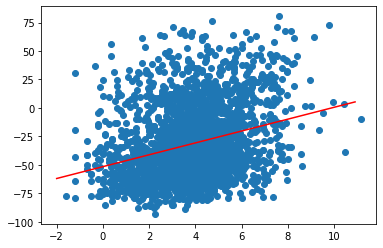

In [18]:
# Plot the line on the scatterplot

x_dummy = np.arange(-2,11,0.1)
yhat_dummy_regress = regress1.predict(x_dummy.reshape(-1, 1))

plt.scatter(train['log_density'],train['votergap'])
plt.plot(x_dummy,yhat_dummy_regress,c="r",label="Linear Regression")

plt.show()

In [19]:
# And finally, evaluate on the test set (useful going forward):

yhat1_train = regress1.predict(train[['log_density']])
yhat1_test = regress1.predict(test[['log_density']])

r2_train = sk.metrics.r2_score(train['votergap'], yhat1_train)
r2_test = sk.metrics.r2_score(test['votergap'], yhat1_test)

mse_train = sk.metrics.mean_squared_error(train['votergap'], yhat1_train)
mse_test = sk.metrics.mean_squared_error(test['votergap'], yhat1_test)
      
results1 = pd.DataFrame(index = ["train","test"])    
results1['R-squared'] = [r2_train,r2_test]
results1['MSE'] = [mse_train,mse_test]

results1

,R-squared,MSE
train,0.081231,914.656221
test,0.080230,1053.468653


**Q0.1** Calculate the residuals for the train set from the linear regression model.  Plot the histogram of residuals and residuals-vs.-predicted scatterplot.  Comment on the assumptions of the linear regression model.

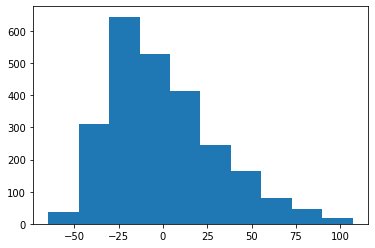

In [21]:
residuals = train['votergap'] - yhat1_train


######
# your code here: use plt.hist
######





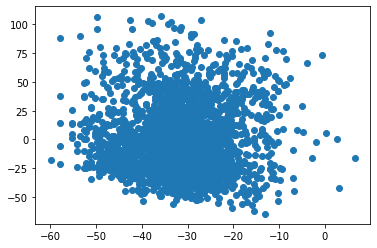

In [22]:
######
# your code here: use plt.scatter
######



The residual histogram and scatterplot below illustrate that the assumptions are reasonable (even though the residuals are moderately left-skewed, there are not any extreme outliers).  The residual scatterplot does not show any clear non-linearities (curvature) or non-constant variance (sometimes called heteroscedasticity).

## Part 1: Bootstrap in Linear Regression 

The residual histogram is clearly non-normal, and this may affect teh reliability of probabilistic based inference ($t$-distribution based ones).  The bootstrap approach is an alternative method to build confidence intervals when this assumption is violated.

**Q1.1** Perform a bootstrap approach to calculate the 95\% confidence intervals based on the method, and compare them to the probabilistic-based ones above from statsmodels.

In [26]:

# define some parameters and initializations:
nboots = 1000
n = np.size(train['votergap'])
np.random.seed(109)
beta1_boots = []

# use a for loop to do the reampling for us
for boot in np.arange(nboots):
    indices = np.random.choice(n,size=n,replace=True)

    ######
    # your code below: fill-in the 5 blanks
    ######
    y_boot = ****
    x_boot = ****
    regress_boot = LinearRegression().fit(****.values.reshape(-1,1), ****)
    beta1_boots.append(****)

    


In [29]:
#print out the first 10 beta1_boots
beta1_boots[0:10]

[4.676939409064684,
 5.59636713449063,
 5.360770684766748,
 5.131550460967473,
 5.043191332192636,
 4.625373413333458,
 4.848429466201817,
 5.930704777594821,
 5.48937442115504,
 5.373201325039841]

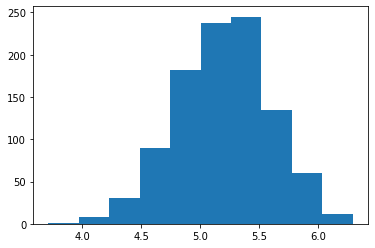

[5.21615611]
[4.39546215 5.9444841 ]


In [30]:
# plot the histogram and pull of the quantiles from the results array using np.quantile to calculate the 95% CI

######
# your code here
######

print(regress1.coef_)

print(np.quantile(****,[****,****]))

*your answer here*


Alternatively, hypothesis testing can be performed with a similar resampling approach (call the permutation or randomization test).  As all hypothesis tests, the sampling distribution (of the statistic of interest: here it is $\beta_1$) should be determined assuming the null hypothesis to be true (to fix the Type 1 error rate at $\alpha = 0.05$).  

Thus, rather than bootstrap resampling the obseervations from the data set, the association is removed empirically: by reshuffling the response variable across the measurements in the predictor variable(s).  One iteration is shown below:

In [31]:
n = np.size(train['votergap'])
y_perm = np.random.choice(train['votergap'],size=n,replace=False)
regress_perm = LinearRegression(fit_intercept=True).fit(train[['log_density']], y_perm)

print("Observed Beta1 =", regress1.coef_, ", Permuted Beta1 =", regress_perm.coef_)


Observed Beta1 = [5.21615611] , Permuted Beta1 = [-0.14217528]


Here we see that our permutaed $\hat{\beta}_1$ is much colser to the null value of zero (in magnitude) than the actual observed one.  Thus our empirically estimated p-value is 0 (our repermuted slope was more extreme than what was actually observed 0 times out of 1 permutation iterations).

**Q1.2** Perform a permutation test (with 1000 iterations) to test whether the linear relationship between `votergap` and `log_density` is statistically significant.

[5.21615611]


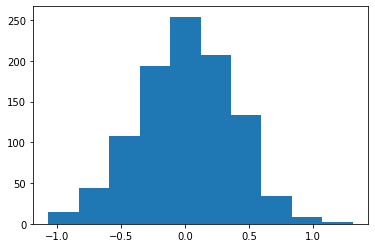

In [34]:
######
# your code here
######

nperms = 1000
n = np.size(train['votergap'])
np.random.seed(109)
beta1_perms = []

# use a for loop to do the reampling for us
for perm in np.arange(nperms):
    ######
    # your code here
    ######
    y_perm = ****
    regress_perm = ****
    beta1_perms.append(****)


plt.hist(beta1_perms);

print(regress1.coef_)

*your answer here*

## Part 2: Multiple Regression

There are many more predictors in the data set (see below), which are mostly percentage of residents in the county (income is median income in dollars, and cancer is number of cancer cases per 100,000 residents per year).

In [ ]:
print(train.columns)
train.describe()

**Q2.1** Fit a simple regression model to predict `votergap` from `log_minority`.  Interpret the slope coefficient and its confidence interval.

In [ ]:
######
# your code here
######


*your answer here*

**Q2.2** Fit a multiple regression model to predict `votergap` from `log_minority` and `log_density`.  Interpret the slope coefficients.

In [ ]:
######
# your code here
###### 



*your answer here*

**Q2.3** Compare the coefficient estimate for `log_density` in both the simple regression model and the multiple regression model.  Why are the different/similar?

*your answer here*

## Part 3: Predictors, predictors, predictors

In this part we will explore 3 very useful types of predictors commonly used in multiple regression (and modeling in general).

1. Categorical Predictors (and dummy variables)
2. Interaction Effects
3. Polynomial Terms as one approach to model non-linearities

**Q3.1** Create two sets of dummy variables: 
1. A variable called `high_density` to indicate whether a county is above the median population density of all counties in the training set.

2. For the 50 different states (+DC) in the `state` variable

Note: pandas's [pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) will be useful for the second task.  Note: it would be useful to use the argument `drop_first=True`

In [ ]:
######
# your code here
######


**Q3.2** Fit a linear regression model to predict `votergap` from `high_density`.  Interpret the model coefficient estimates.  When would a model like this be preferred to using the quantitative version of `density` or `log_density`?

In [ ]:
######
# your code here
######


*your answer here*

**Q3.3** Fit a linear regression model to predict `votergap` from `state` (or the state dummies, whichever is easier) in both sklearn and in statsmodels.  Interpret the slope coefficient associated with Massachusetts.  

In [ ]:
######
# your code here
######

# sklearn

# statsmodels approach: remember to manually add the intercept.


*your answer here*

A single interaction term is easy to calculate manually, but the job can be a chore if there are a lot of interaction terms you want to create.  Below is the code to create an interaction term both ways:

In [ ]:
train['minority_density_interact'] = train['log_minority']*train['log_density']

X_interact = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(train[['log_minority','log_density']])
pd.DataFrame(X_interact).head()

**Q3.4** Fit a linear regression model to predict `votergap` from `log_minority`, `log_density` and their interaction.  Print out the coefficient estimates for this model and interpret the interaction term.  How does this model compare to the multiple regression model in Q2.2?

In [ ]:
######
# your code here
######


*your answer here*

Similarly, polynomial terms are easy to calculate manually, but the job can be a chore if the order of polynomial function gets high.  Below is the code to create some polynomial terms both manually and using pd.PolynomialFeatures (note: PolynomialFeatures can be used to create interaction terms, polynomial terms, or both!):

In [ ]:
train['log_minority_2'] = train['log_minority']**2
train['log_minority_3'] = train['log_minority']**3

X_poly = PolynomialFeatures(3, include_bias=False).fit_transform(train[['log_minority']])

train[['log_minority','log_minority_2','log_minority_3']].head()
#pd.DataFrame(X_poly).head()



**Q3.5** Fit a 3rd order polynomial regression model to predict `votergap` from `log_minority`.  Print out the coefficient estimates and plot the prediction curve on top of the scatterplot.

In [ ]:
######
# your code here
######


In [ ]:
######
# your code here
######

#do the predictions and plot them



*your answer here*

## Part 4: Variable Selection

In this part we will step through forward variable selection.  Recall our original data set has several quantitative predictors (plus `state`):

['population','hispanic', 'minority', 'female', 
             'unemployed', 'income', 'nodegree', 'bachelor', 'inactivity', 'obesity', 'density', 
             'cancer']

Note: several of them are extremely right-skewed and could be better incorporated using the log: population, hispanic, minority, and density (these are the most etreme right-skewed).

In [ ]:
predictors = ['population','hispanic', 'minority', 'female', 
             'unemployed', 'income', 'nodegree', 'bachelor', 'inactivity', 'obesity', 'density', 
             'cancer']

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

count = 0
for variable in predictors:
    ax[count%4][int(count/4)].hist(train[variable],)
    ax[count%4][int(count/4)].set_xlabel(variable)
    count = count + 1




In [ ]:
train['log_population'] = np.log(train['population'])
train['log_hispanic'] = np.log(train['hispanic'])

test['log_population'] = np.log(test['population'])
test['log_hispanic'] = np.log(test['hispanic'])

# imputing median cancer rate for the 40 or so counties with missing cancer rates
train['cancer'].loc[train['cancer'].isnull()] = np.median(train['cancer'])
test['cancer'].loc[test['cancer'].isnull()] = np.median(train['cancer'])

**Q4.1** Fit the full *main effects* model with the 12 predictor variables listed below.  Determine its $R^2$ in the test set.

In [ ]:
predictors = ['log_population','log_hispanic', 'log_minority', 'female', 
             'unemployed', 'income', 'nodegree', 'bachelor', 'inactivity', 'obesity', 'log_density']


######
# your code here
######



**Q4.2** Fit the full *interaction* model with the 12 predictor variables and all of their interaction terms.  How many interaction terms are involved? Determine its $R^2$ in the test set.

In [ ]:
######
# your code here
######


Unfortunately there is no automatic way to do sequential variable selection in sklearn or statsmodels (we'll learn why eventually). One way to do manual variable selection is to fit the most complex model you want to consider, and start removing variables one at a time based on their p-value of their $t$-statistic, until all you are left with only statistically significant predictors (with p-values all less than 0.05) model.

The code below shows a brief outline of how to get started with this process in statsmodels:

In [ ]:

# First turn the full design matrix into a panda's DataFrame
df4_3 = pd.DataFrame(X4_2)
# print(df4_3.shape)

# Fit the model with all predictors and determine which has the largest p-value
model4_3_temp = lm.OLS(train['votergap'],df4_3).fit()
print(np.argmax(model4_3_temp.pvalues))

# you can confirm it with the summary output
model4_3_temp.summary()

In [ ]:
# Now start dropping variables, one at a time
df4_3 = df4_3.drop(np.argmax(model4_3_temp.pvalues),axis=1)
df4_3.shape

In [ ]:
# And refit, and redetermine the max p-value
model4_3_temp = lm.OLS(train['votergap'],df4_3).fit()
print("Predictor#: ", np.argmax(model4_3_temp.pvalues), ", with associated p-value of" ,np.max(model4_3_temp.pvalues))

**Q4.3** 
Wrap the above code in a function in order to find the .  Determine the $R^2$ in the test se for this parsimonious model.  How does it compare to the predictive ability of the models in Q4.2 and Q4.1?

In [ ]:
######
# your code here
######
df4_3 = pd.DataFrame(X4_2)
cutoff = 0.20

for i in np.arange(df4_3.shape[1]):
    model4_3_temp = lm.OLS(train['votergap'],df4_3).fit()
    if(np.max(model4_3_temp.pvalues) > cutoff):
        ######
        # your code here
        ######

    else:
        break

regress4_3 = LinearRegression(****)
df4_3.shape

In [ ]:
# Below we transform the test X-variables just like we did in the training set, 
# and only use the variables we need to predict the test set using `regress4_3` 
X4_2_test = PolynomialFeatures(2, interaction_only=False, include_bias=True).fit_transform(test[predictors])
X4_3_test = pd.DataFrame(X4_2_test)[df4_3.columns]

######
# Your code below: Determine R-sq on test
######

*your answer here*